<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codecentric Summercourse ML 
This is part one of the summercourse ML organised by Codecentric. 
## Neural network
In this tutorial we are going to explain how to create a neural network in Keras that is used for classifying the MNIST fashion data set. This is a dataset of 60.000 Zalando's article images.
Each training and test example is assigned to one of the following labels:
0. T-Shirt
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 

More information about the data set can be found [here](https://www.kaggle.com/zalando-research/fashionmnist).


#Imports

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Data preprocessing

In [0]:
labels = {0:"T-Shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(labels[2])

Pullover



Create a mapper to translate the labels to the actual values.

In [0]:
(x_train_input, y_train_input), (x_test_input, y_test_input) = fashion_mnist.load_data()

The load_data() function on the dataset can be used for the datasets that are included in Keras. The other datasets that can be loaded in the same way can be found on the [Keras website](https://keras.io/datasets/). 
The load_data() function returns the train and test data set for the MNIST fashion data set. Both the test and train data are divided in two parts, the image and the label. x_train_input contains all the images we are going to use to train the neural network. The y_train_input contains all the labels for those images. 


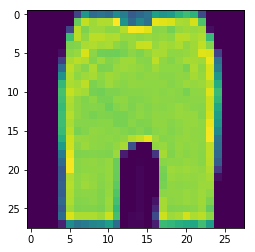

1 Trouser


In [0]:
image_index = 8921 # Can be any number between 0 and 59999
print(y_train_input[image_index], labels[y_train_input[image_index]])
plt.imshow(x_train_input[image_index])


The *matplotlib.pyplot as plt* can be used to show the images in the dataset. 
We also print the label of that image, which is a number between 1 and 9. With the mapping we can convert this number to the actual name of the label. 


In [0]:
print(x_train_input.shape, y_train_input.shape, x_test_input.shape, y_test_input.shape)
print(x_train[8921][26][22])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
229


In machine learning it is really important to understand and have a feeling for the shapes of the data. 
 We need to make sure the input data matches the first layer of the model.  Above we printed the shape of each data. For x_train_input this is (60000, 28, 28). This means we have a three-dimensional array that contains 60.000 * 28 * 28 data points (~47 million). The 60.000 are the number of images we have in the dataset. The 28, 28 are the height and the width of the images in pixels. Each datapoint is a number between 0 and 255, which represents the color of that pixel. 

The y_train_input is (60000,) which is a array with 60.000 datapoints. Each datapoint represent the label of the image and is a number between 0 and 9. 

x_test_input and y_test_input are similar to x_train_input and y_train_input, only with a different amount of images. 

In [0]:
image_size = 28*28
# x_train.shape[0] is the amount of images. 
x_train = x_train_input.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test_input.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape)

(60000, 784)


The neural network that we are creating is not expecting two dimensional data. (*There are layers that accept two dimensional arrays, which we will see in the next part*) So we have translate the input data into a format the neural network can handle. We can use the reshape function to change the format from a (60000, 28, 28) to a  (60000, 784) array. Furthermore we normalize the data between 0.0 and 1.0, by dividing by 255. 

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_input, num_classes)
y_test = keras.utils.to_categorical(y_test_input, num_classes)
print(y_train.shape, y_test.shape)

index_y = 3
print(y_train[index_y])
print(y_train_input[index_y])


(60000, 10) (10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


We also have to change the format of the labels, since the numerical values of the labels have no relation with each other. To do this, we can use the keras utils to map each label to a single column. Each Shirt (0), has 1 in the first column. All other labels have 0 in that column. The model will predict the likelyhood for each category whether that is the item in the picture.


![wow](https://github.com/Barttje/summercourse-ml/blob/master/one_hot_encoding.png?raw=true)



#Creating and training the neural network

In [0]:
neurons_in_hidden_layer=512
model = Sequential()
model.add(Dense(units=neurons_in_hidden_layer, activation='relu', input_shape=(image_size,))) # Input layer
model.add(Dense(units=num_classes, activation='softmax')) # Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy')

NameError: ignored

Explain layers
![alt text](https://raw.githubusercontent.com/Barttje/summercourse-ml/master/Neural_network_fashion_1.png)
Explain loss functions
Explain optimizer
Explain activation functions

In [0]:
epochs = 10
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 307us/step - loss: 0.4907 - acc: 0.8256 - val_loss: 0.3855 - val_acc: 0.8605
Epoch 2/10
48000/48000 [==============================] - 14s 287us/step - loss: 0.3692 - acc: 0.8641 - val_loss: 0.3903 - val_acc: 0.8557
Epoch 3/10
48000/48000 [==============================] - 13s 275us/step - loss: 0.3315 - acc: 0.8769 - val_loss: 0.3559 - val_acc: 0.8718
Epoch 4/10
48000/48000 [==============================] - 14s 285us/step - loss: 0.3030 - acc: 0.8878 - val_loss: 0.3379 - val_acc: 0.8800
Epoch 5/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.2842 - acc: 0.8945 - val_loss: 0.3470 - val_acc: 0.8737
Epoch 6/10
48000/48000 [==============================] - 13s 277us/step - loss: 0.2659 - acc: 0.9000 - val_loss: 0.3307 - val_acc: 0.8833
Epoch 7/10
48000/48000 [==============================] - 14s 287us/step - loss: 0.2545 - acc: 0.9040 - val_loss: 0.

explain epochs and validation split 




In [0]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 63us/step
0.34136612924933435 0.8843


explain loss and accuracy

#Applying the model

[[0.09927769 0.04473818 0.07418048 0.08523015 0.11538069 0.21577431
  0.07970487 0.12280151 0.03475258 0.12815952]]
5 Sandal
9 Ankle boot


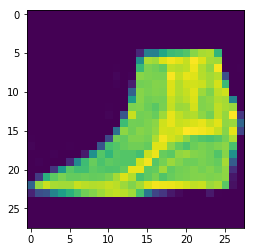

In [0]:
index = 6293
pred = model.predict(x_test[-index:-index+1]) 
print(pred)
print(pred.argmax(), labels[pred.argmax()])
print(y_test[-index:-index+1].argmax(), labels[y_test[-index:-index+1].argmax()] )
plt.imshow(x_test[-index:-index+1][0].reshape(28,28))



explain prediction, explain arg max, compare with actual class

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


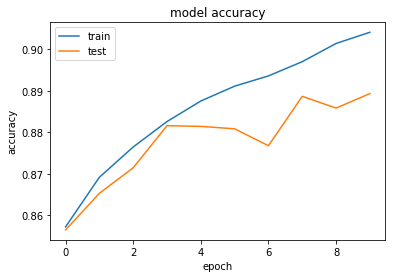

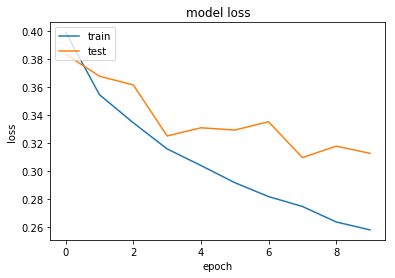

In [0]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Overfitting and Underfitting
Overfitting occurs when the model also learns from the noise and inaccurate data. Underfitting occurs when the model does not learn anything at all. With overfitting you learn to much from the data and with underfitting you learn not enough from the data. ![Overfitting,underfitting and balanced](https://github.com/Barttje/summercourse-ml/blob/master/Overfitting_underfitting.png?raw=true)
### Detecting overfitting/underfitting
Underfitting occurs when the loss is very high and the accuray is very low. Overfitting occurs when there is a gap between the accuracy and loss of the training data set and of the test data set. 
#### Handling overfitting
Early Stopping: Its rules provide us the guidance as to how many iterations can be run before learner begins to over-fit.
Drop out layers: 
#### Handling underfitting
Try to get more input data. 
Try more epochs. Check if score is increasing. 
If there is high bias, try to increase the complexity of the model, by adding more layers. 